In [1]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Getting Data

In [2]:
df = pd.read_csv('drug200.csv')

# Exploring Data

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.shape

(200, 6)

In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# Cleaning Data

### Encoding

In [7]:
chol_encoder = OrdinalEncoder(categories=[['NORMAL', 'HIGH']])
df['Cholesterol'] = chol_encoder.fit_transform(df[['Cholesterol']])
print("Transformed:", df['Cholesterol'].unique())

chol_decoded = chol_encoder.inverse_transform(df[['Cholesterol']])
print("Decoded:", np.unique(chol_decoded))


sex_encoder = LabelEncoder()
df['Sex'] = sex_encoder.fit_transform(df['Sex'])
print("Transformed:", df['Sex'].unique())

sex_decoded = sex_encoder.inverse_transform(df['Sex'])
print("Decoded:", np.unique(sex_decoded))


BP_encoder = OrdinalEncoder(categories=[['LOW', 'NORMAL', 'HIGH']])
df['BP'] = BP_encoder.fit_transform(df[['BP']])
print("Transformed:", df['BP'].unique())

BP_decoded = BP_encoder.inverse_transform(df[['BP']])
print("Decoded:", np.unique(BP_decoded))

Transformed: [1. 0.]
Decoded: ['HIGH' 'NORMAL']
Transformed: [0 1]
Decoded: ['F' 'M']
Transformed: [2. 0. 1.]
Decoded: ['HIGH' 'LOW' 'NORMAL']


### Changing Data Type

In [8]:
df['Age'] = df['Age'].astype(np.int16)
df[['Sex', 'BP', 'Cholesterol']] = df[['Sex', 'BP', 'Cholesterol']].astype(np.int8)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int16  
 1   Sex          200 non-null    int8   
 2   BP           200 non-null    int8   
 3   Cholesterol  200 non-null    int8   
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int16(1), int8(3), object(1)
memory usage: 4.2+ KB


# Correlation

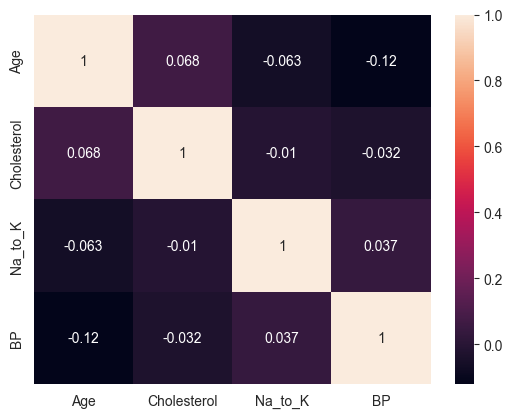

In [9]:
corr = df[['Age', 'Cholesterol', 'Na_to_K', 'BP']].corr()
sns.heatmap(corr, annot=True)
plt.show()

#  Analysis

### Counting Drugs

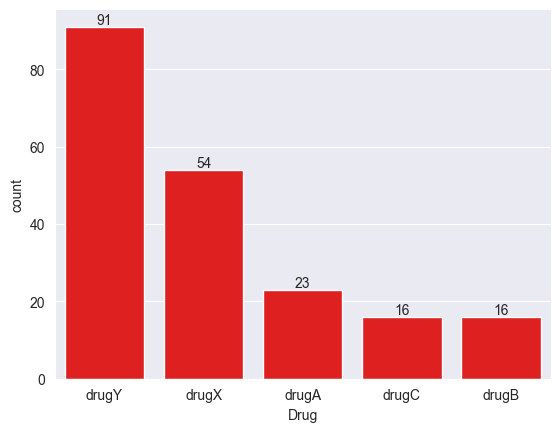

In [10]:
drugs_count = df['Drug'].value_counts()
ax = sns.barplot(drugs_count, color='r')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

# Counting Sex

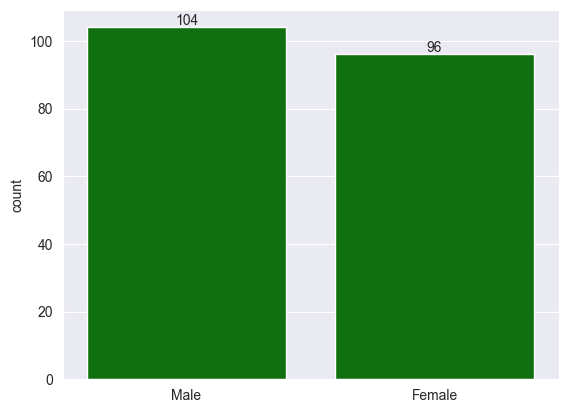

In [11]:
sex_count = df['Sex'].value_counts()
ax = sns.barplot(x=['Male', 'Female'], y=sex_count, color='g')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

# Drugs Use by Either Gender

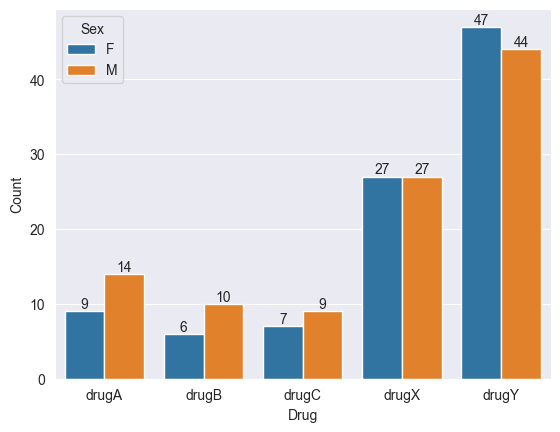

In [12]:
drugs_grouped = df.groupby(['Drug', 'Sex']).size().reset_index()
drugs_grouped.columns = ['Drug', 'Sex', 'Count']
drugs_grouped['Sex'] = sex_encoder.inverse_transform(drugs_grouped['Sex'])

ax = sns.barplot(data=drugs_grouped, x='Drug', y='Count', hue='Sex')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.show()

# Decision Tree

Accuracy score: 0.9875
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Model Accuracy: 1.0


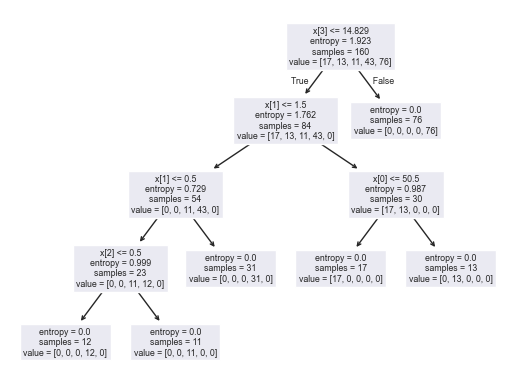

In [13]:
x = np.asanyarray(df[['Age', 'BP', 'Cholesterol', 'Na_to_K']])
y = np.asanyarray(df['Drug']) 

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(train_x, train_y)

y_pred = tree.predict(test_x)

kf = KFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(tree, train_x, train_y, cv=kf, scoring='accuracy')

print("Accuracy score:", scores.mean())
print(classification_report(test_y, y_pred))
print('Model Accuracy:', accuracy_score(test_y, y_pred))

plot_tree(tree)
plt.show()